In [1]:
import functools
from multiprocessing import Pool
import os

import numpy as np
import scipy.optimize as optimize
from scipy import integrate 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize="large") 
matplotlib.rc('ytick', labelsize="large") 
%matplotlib inline

import experiment

In [2]:
# load data
data2011 = np.loadtxt("data/emission/gt_2011.csv",skiprows=1,delimiter=',')
data2012 = np.loadtxt("data/emission/gt_2012.csv",skiprows=1,delimiter=',')
data2013 = np.loadtxt("data/emission/gt_2013.csv",skiprows=1,delimiter=',')
data2014 = np.loadtxt("data/emission/gt_2014.csv",skiprows=1,delimiter=',')
data2015 = np.loadtxt("data/emission/gt_2015.csv",skiprows=1,delimiter=',')
data = np.concatenate((data2011,data2012,data2013,data2014,data2015), axis=0)
y = data[:, -1]
x = data[:, :-2]
(n, d) = np.shape(x)

In [14]:
if __name__ ==  '__main__': 
    num_processors = os.cpu_count()
    num_trials = 1000
    
    sigma = 1.
    alpha = 0.3
    epsilon = 2.5
    ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
    cus = np.array([90, 100, 110, 120, 130])
    cls = np.array([60,  50,  40,  30,  20])

    his = np.zeros((len(cus), len(ns), num_trials, d))
    
    for j in range(len(cus)):
        expe = functools.partial(experiment.experiment, x=x, y=y, sigma=sigma, 
                                 alpha=alpha, epsilon=epsilon, cu=cus[j], cl=cls[j])
        for k, n_dash in enumerate(ns):
            with Pool(processes = num_processors) as p:
                output = np.array(p.map(expe,np.ones(num_trials,dtype=int)*n_dash))
            his[j, k] = output
    
    # np.save("outputs/appE2_his.npy", his)

In [16]:
# his = np.load("outputs/appE2_his.npy")
ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
covs = np.zeros((len(cus), len(ns)))
for j in range(len(cus)):
    for k in range(len(ns)):
        covs[j, k] = np.linalg.norm(np.cov((his[j, k]-np.average(his[j,k], axis=0)).transpose()))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


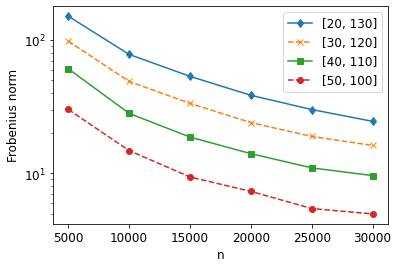

In [21]:
plot = plt.semilogy # log scale
# plot = plt.plot # linear scale
plot(ns, covs[4], "-d", label="[20, 130]")
plot(ns, covs[3], "--x", label="[30, 120]")
plot(ns, covs[2], "-s", label="[40, 110]")
plot(ns, covs[1], "--o", label="[50, 100]")
# plot(ns, 100000/ns, "--", label="O(1/n)")
plt.xlabel("n",fontsize="large")
plt.ylabel("Frobenius norm",fontsize="large")
plt.legend(fontsize="large")
# plt.savefig("appE2.eps") # save the figure
plt.show()